<a href="https://colab.research.google.com/github/TeamArdra/Member_name/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="MiIoLqxDVN56toRpsz8k")
project = rf.workspace("nice-9c4n4").project("object-detection-isdc")
model = project.version(5).model

# infer on a local image
# print(model.predict("/content/drone_test.jpg", confidence=30, overlap=30).json())
predictions_data= model.predict("/content/drone_test.jpg", confidence=30, overlap=30).json()
print(predictions_data)


model.predict("/content/drone_test.jpg", confidence=20, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

loading Roboflow workspace...
loading Roboflow project...


TypeError: 'NoneType' object cannot be interpreted as an integer

In [5]:
predictions_data={'predictions': [{'x': 1079.0, 'y': 1342.5, 'width': 760.0, 'height': 509.0, 'confidence': 0.8208142518997192, 'class': 'Obstacles', 'class_id': 1, 'image_path': '/content/drone_test.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 571.5, 'y': 387.0, 'width': 761.0, 'height': 748.0, 'confidence': 0.7818746566772461, 'class': 'Obstacles', 'class_id': 1, 'image_path': '/content/drone_test.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 449.5, 'y': 960.0, 'width': 131.0, 'height': 136.0, 'confidence': 0.7469130754470825, 'class': 'Cones', 'class_id': 0, 'image_path': '/content/drone_test.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 1404.0, 'y': 855.5, 'width': 354.0, 'height': 305.0, 'confidence': 0.7452728748321533, 'class': 'Obstacles', 'class_id': 1, 'image_path': '/content/drone_test.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '1600', 'height': '1600'}}

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import json
import os
import cv2
from queue import PriorityQueue

In [6]:
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

In [7]:
def astar_direct(grid, start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))

    came_from = {}
    cost_so_far = {start: 0}

    while not open_set.empty():
        current = open_set.get()[1]

        if current == goal:
            break

        for i in range(-1, 2):
            for j in range(-1, 2):
                neighbor = (current[0] + i, current[1] + j)
                if (
                    0 <= neighbor[0] < grid.shape[0]
                    and 0 <= neighbor[1] < grid.shape[1]
                    and grid[neighbor] == 0
                ):
                    new_cost = cost_so_far[current] + (1 if i == 0 or j == 0 else np.sqrt(2))
                    if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                        cost_so_far[neighbor] = new_cost
                        priority = new_cost + heuristic(neighbor, goal)
                        open_set.put((priority, neighbor))
                        came_from[neighbor] = current

    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()

    return path

In [8]:
def astar_direct_path(grid, start, waypoints):
    path = []
    current_start = start

    for waypoint in waypoints:
        segment_path = astar_direct(grid, current_start, waypoint)
        path.extend(segment_path[:-1])  # Avoid duplicate points
        current_start = waypoint
        print(type(waypoint))

    final_path = astar_direct(grid, current_start, waypoints[-1])
    path.extend(final_path)  # Include all points of the final path

    return path

In [9]:
obstacle_list = []
waypoint_list = []

# Iterate through predictions and append to the corresponding list
for prediction in predictions_data['predictions']:
    if prediction['class'].lower() == 'obstacles':
        obstacle_list.append(prediction)
    elif prediction['class'].lower() == 'cones':
        waypoint_list.append(prediction)

# Display the results
print("Obstacle List:")
print(obstacle_list)

print("\nWaypoint List:")
print(waypoint_list)

Obstacle List:
[{'x': 1079.0, 'y': 1342.5, 'width': 760.0, 'height': 509.0, 'confidence': 0.8208142518997192, 'class': 'Obstacles', 'class_id': 1, 'image_path': '/content/drone_test.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 571.5, 'y': 387.0, 'width': 761.0, 'height': 748.0, 'confidence': 0.7818746566772461, 'class': 'Obstacles', 'class_id': 1, 'image_path': '/content/drone_test.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 1404.0, 'y': 855.5, 'width': 354.0, 'height': 305.0, 'confidence': 0.7452728748321533, 'class': 'Obstacles', 'class_id': 1, 'image_path': '/content/drone_test.jpg', 'prediction_type': 'ObjectDetectionModel'}]

Waypoint List:
[{'x': 449.5, 'y': 960.0, 'width': 131.0, 'height': 136.0, 'confidence': 0.7469130754470825, 'class': 'Cones', 'class_id': 0, 'image_path': '/content/drone_test.jpg', 'prediction_type': 'ObjectDetectionModel'}]


In [10]:
example_image_path= "/content/drone_test.jpg"

(699.0, 3.0) (1459.0, 3.0) (1459.0, 512.0) (699.0, 512.0)
(191.0, 839.0) (952.0, 839.0) (952.0, 1587.0) (191.0, 1587.0)
(1227.0, 592.0) (1581.0, 592.0) (1581.0, 897.0) (1227.0, 897.0)
[(449.5, 960.0)]
<class 'list'>
<class 'tuple'>


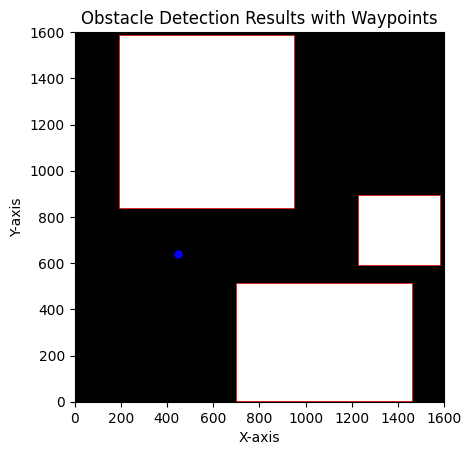

In [11]:
example_image = cv2.imread(example_image_path)
image_height, image_width, _ = example_image.shape

# Choose grid size based on image dimensions
grid_size = (image_height, image_width)

# Create an empty image (grid)
image = np.zeros(grid_size)

# Plot obstacles on the grid
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')


for prediction in obstacle_list:
  x, y, width, height = (
    prediction["x"],
    image_height - prediction["y"],  # Invert y-coordinate
    prediction["width"],
    prediction["height"],
    )

            # Calculate half-width and half-height
  half_width = width / 2
  half_height = height / 2

            # Calculate vertices of the bounding box
  x1, y1 = x - half_width, y - half_height
  x2, y2 = x + half_width, y - half_height
  x3, y3 = x + half_width, y + half_height
  x4, y4 = x - half_width, y + half_height

  print((x1,y1),(x2,y2),(x3,y3),(x4,y4))

            # Draw a rectangle for each detected obstacle
  rect = patches.Polygon(
        [(x1, y1), (x2, y2), (x3, y3), (x4, y4)],
        linewidth=0.5, edgecolor="red", facecolor="white"
        )
  ax.add_patch(rect)

        # Access the imported data for waypoints


        # Plot waypoints on the same image
waypoints_x = [int(float(waypoint["x"])) for waypoint in waypoint_list]
waypoints_y = [(image_height-float(waypoint["y"])) for waypoint in waypoint_list]  # Do not invert y-coordinate
waypts=[((((waypoint["x"])), ((waypoint["y"])))) for waypoint in waypoint_list]
print(waypts)
print(type(waypts))
for i in waypts:
  print(type(i))
#waypoints_x.append(1000)
#waypoints_y.append(1500)

ax.plot(waypoints_x, waypoints_y, marker='o', markersize=5, color='blue', linestyle='None')

        # Update plot limits based on the chosen grid size
ax.set_xlim(0, image_width)
ax.set_ylim(0, image_height)

plt.title("Obstacle Detection Results with Waypoints")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [12]:
import numpy as np

def create_occupancy_grid_from_predictions(grid_size, predictions):
    grid = np.zeros(grid_size)

    obstacle_centers = []
    for obstacle in predictions:
      ( x, y, width, height) = (obstacle['x'], obstacle['y'], obstacle['width'], obstacle['height'])

      # Calculate obstacle center
      half_width = width / 2
      half_height = height / 2

            # Calculate vertices of the bounding box
      x1, y1 = x - half_width, y - half_height
      x2, y2 = x + half_width, y - half_height
      x3, y3 = x + half_width, y + half_height
      x4, y4 = x - half_width, y + half_height

      print(x1,x2,y1,y2)
        # Mark cells within the obstacle boundaries as occupied
      for i in range(int(max(0,x1)), int(min(grid_size[0],x2))):
          for j in range(int(max(0,y1)),int( min(grid_size[1],y3))):
            grid[i, j] = 1  # Mark cell as occupied

      print(grid)

      # rect = patches.Polygon(
      #   [(x1, y1), (x2, y2), (x3, y3), (x4, y4)],
      #   linewidth=0.5, edgecolor="red", facecolor="white"
      #   )
      # ax.add_patch(rect)

    return grid, obstacle_centers

In [13]:
def plot_occupancy_grid_with_path_and_waypoints(occupancy_grid, start, destination, path, waypoints):
    plt.imshow(occupancy_grid, cmap='gray', origin='lower')
    plt.scatter(start[1], start[0], color='green', marker='o', label='Start')
    plt.scatter(destination[1], destination[0], color='red', marker='o', label='Destination')
    plt.scatter([p[1] for p in waypoints], [p[0] for p in waypoints], color='blue', marker='*', label='Waypoints')
    for i in range(len(path) - 1):
      plt.arrow(path[i][1], path[i][0], path[i + 1][1] - path[i][1], path[i + 1][0] - path[i][0],
              head_width=0.2, head_length=0.2, fc='orange', ec='orange')
    plt.legend()
    plt.title('Occupancy Grid Map with Path and Waypoints (Diagonal Movement Allowed)')
    plt.xlabel('Y-axis')
    plt.ylabel('X-axis')
    plt.show()

In [14]:
print(waypts)


[(449.5, 960.0)]


699.0 1459.0 1088.0 1088.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
191.0 952.0 13.0 13.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1227.0 1581.0 703.0 703.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[(449.5, 960.0), (600, 1400)]
[(449, 960), (600, 1400)]
<class 'tuple'>
<class 'tuple'>


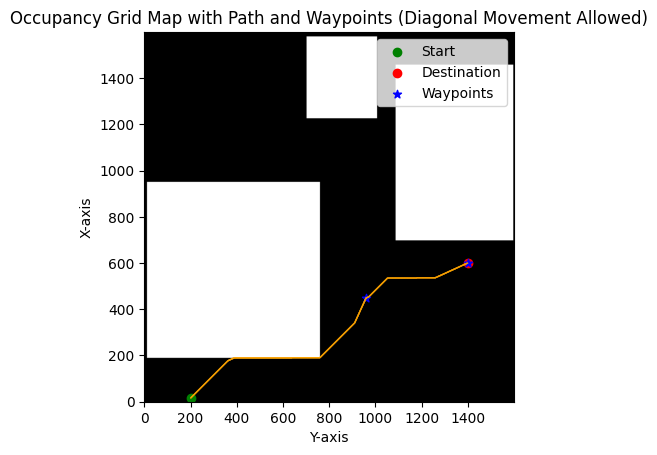

In [15]:
start = (15,200)
destination = (600,1400)

# Initialize waypts as an empty list
occupancy_grid, obstacle_centers = create_occupancy_grid_from_predictions(grid_size, obstacle_list)
waypts.append(destination)
print(waypts)
wpts= [(int(x), int(y)) for x,y in waypts]
print(wpts)
path_direct = astar_direct_path(occupancy_grid, start, wpts)


plot_occupancy_grid_with_path_and_waypoints(occupancy_grid, start, destination, path_direct, wpts)